# Problem 1 - Bias Variance Tradeoff

## 1.1

Text(0.5, 1.0, '$f(x) = x + sin(1.5x)$ and Sampled Points y')

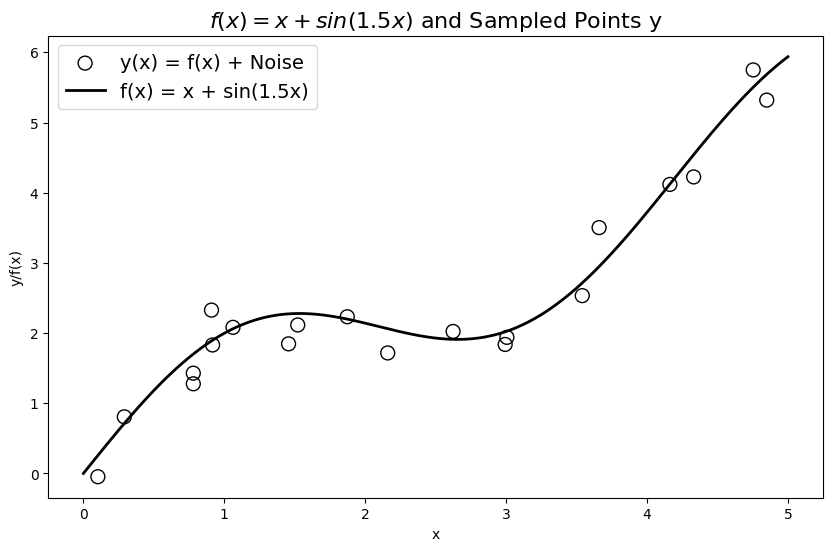

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the function f(x) = x + sin(1.5x)
def f(x):
    return x + np.sin(1.5 * x)

# Generate 20 random x values in the range [0, 5] and sort them
x = np.sort(np.random.uniform(0, 5, 20))

# Compute y values by adding normally distributed noise to f(x)
noise_std_dev = 0.3
y = f(x) + np.random.normal(0, noise_std_dev, 20)

# Define a range of x values for plotting f(x) smoothly between 0 and 5
x_smooth = np.linspace(0, 5, 1000)
f_smooth = f(x_smooth)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=100, edgecolor='black', facecolors='none', label='y(x) = f(x) + Noise')  # Scatter plot for y
plt.plot(x_smooth, f_smooth, color='black', linestyle='-', linewidth=2, label='f(x) = x + sin(1.5x)')  # Line plot for f(x)
plt.xlabel('x')
plt.ylabel('y/f(x)')
plt.legend(fontsize=14)
plt.title('$f(x) = x + sin(1.5x)$ and Sampled Points y', fontsize=16)


## 1.2

Estimator g1(x):
0.54 * x^0 + 0.83 * x^1
Estimator g3(x):
0.01 * x^0 + 2.81 * x^1 + -1.27 * x^2 + 0.19 * x^3
Estimator g5(x):
-0.36 * x^0 + 3.87 * x^1 + -1.64 * x^2 + -0.10 * x^3 + 0.16 * x^4 + -0.02 * x^5
Estimator g10(x):
-2.56 * x^0 + 38.45 * x^1 + -168.83 * x^2 + 365.69 * x^3 + -435.16 * x^4 + 309.22 * x^5 + -136.96 * x^6 + 38.13 * x^7 + -6.48 * x^8 + 0.61 * x^9 + -0.02 * x^10


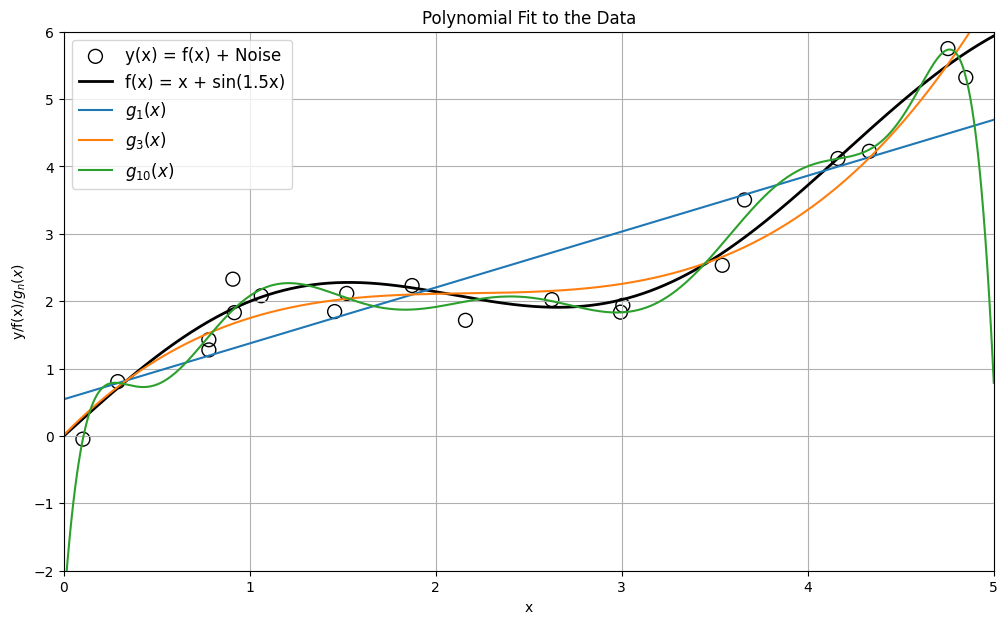

In [ ]:
# Create the plot for original data, true function, and polynomial fits
plt.figure(figsize=(12, 7))
plt.scatter(x, y, s=100, edgecolor='black', facecolors='none', label='y(x) = f(x) + Noise')
plt.plot(x_smooth, f_smooth, color='black', linestyle='-', linewidth=2, label='f(x) = x + sin(1.5x)')

# Fit and plot polynomial models
degrees = [1, 3, 5, 10]
for degree in degrees:
    coefs = np.polyfit(x, y, degree)
    print(f'Estimator g{degree}(x):')
    print(' + '.join([f'{coef:.2f} * x^{i}' for i, coef in enumerate(coefs[::-1])]))

degrees2 = [1, 3, 10]
for degree in degrees2:
    coefs = np.polyfit(x, y, degree)
    p = np.poly1d(coefs)
    plt.plot(x_smooth, p(x_smooth), label=f'$g_{{{degree}}}(x)$')

plt.xlabel('x')
plt.ylabel('y/f(x)/$g_n(x)$')
plt.title('Polynomial Fit to the Data')
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim([0, 5])
plt.ylim([-2, 6])  # Adjusted the y-axis limit to fit the range of the actual data and functions
plt.show()

- Underfitting ➡ blue line ➡ g1(x)
- Overfitting ➡ green line ➡ g10(x)

## 1.3

In [ ]:
from collections import defaultdict
#Hyper parameters
np.random.seed(0)
std = 0.3 #gaussian noise std
dsize = 50 #size of each dataset
n_dataset = 100 #number of dataset
n_trainset = int(np.ceil(dsize * 0.8))
polynomial_degrees = range(1, 16) #model complexities
#Fixed x values
x = np.linspace(0, 5, dsize)
x = np.random.permutation(x)
x_train = x[:n_trainset]
x_test = x[n_trainset:]
#Variables
theta_hat = defaultdict(list)
pred_train = defaultdict(list)
pred_test = defaultdict(list)
train_errors = defaultdict(list)
test_errors = defaultdict(list)
def error(pred, actual):
    return (pred - actual) ** 2

# Assuming you have defined a function to generate noisy y values earlier like so:
def sample_fx_data(fx, shape, noise_std=0.3):
    return fx + np.random.randn(*shape) * noise_std

# Loop over datasets
def train_over_polynomial_degrees():
    for dataset in range(n_dataset):
        # Simulate training/testing targets
        y_train = sample_fx_data(f(x_train), x_train.shape, std)
        y_test = sample_fx_data(f(x_test), x_test.shape, std)
# Loop over model complexities
        for degree in polynomial_degrees:
            # Train model
            tmp_theta_hat = np.polyfit(x_train, y_train, degree)
# Make predictions on train set
            tmp_pred_train = np.polyval(tmp_theta_hat, x_train)
            pred_train[degree].append(tmp_pred_train)
# Test predictions
            tmp_pred_test = np.polyval(tmp_theta_hat, x_test)
            pred_test[degree].append(tmp_pred_test)
# Mean Squared Error for train and test sets
            train_errors[degree].append(np.mean(error(tmp_pred_train, y_train)))
            test_errors[degree].append(np.mean(error(tmp_pred_test, y_test)))
def calculate_estimator_bias_squared(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]
    return np.mean((average_model_prediction - f(x_test)) ** 2)
def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]
    return np.mean((pred_test - average_model_prediction) ** 2)

#Without Regularization
train_over_polynomial_degrees()
complexity_train_error = []
complexity_test_error = []
bias_squared = []
variance = []
for degree in range(1, 16):
    complexity_train_error.append(np.mean(train_errors[degree]))
    complexity_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))
best_model_degree = polynomial_degrees[np.argmin(complexity_test_error)]


### 1.3.(a)

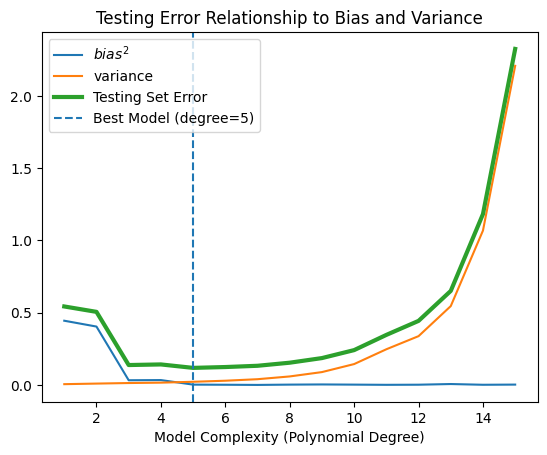

In [ ]:
# Plot values
plt.plot(polynomial_degrees, bias_squared, label='$bias^2$')
plt.plot(polynomial_degrees, variance, label='variance')
plt.plot(polynomial_degrees, complexity_test_error, label='Testing Set Error', linewidth=3)
plt.axvline(best_model_degree, linestyle='--', label=f'Best Model (degree={best_model_degree})')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.title('Testing Error Relationship to Bias and Variance')
plt.legend()
plt.show()  # Ensure that the plot is shown

### 1.3.(b)

In [ ]:
# Print out the best model degree and its error, bias, bias^2, and variance
print(f"Best Model is of Degree {best_model_degree} with Minimum Error {min(complexity_test_error):.4f}")
print(f"Bias for Best Model: {np.sqrt(bias_squared[best_model_degree - 1]):.4f}")  # Square root of squared bias
print(f"Squared Bias for Best Model: {bias_squared[best_model_degree - 1]:.4f}")
print(f"Variance for Best Model: {variance[best_model_degree - 1]:.4f}")


Best Model is of Degree 5 with Minimum Error 0.1182
Bias for Best Model: 0.0487
Squared Bias for Best Model: 0.0024
Variance for Best Model: 0.0220
